<a href="https://colab.research.google.com/github/aleena024/Lab1ML/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
dc = pd.read_csv('/content/Churn_Modelling.csv')
dc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#data cleaning
# Check for missing values
print(dc.isnull().sum())

# Drop missing values
dc = dc.dropna()

# Check for duplicate rows
print(dc.duplicated())

# Drop duplicate rows
dc = dc.drop_duplicates()

# # Clean up the data
# dc['Name'] = dc['Name'].str.title()
# dc['Country'] = dc['Country'].str.upper()

# Print the DataFrame
print(dc)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...      

In [ ]:
#noisy data
# Check for outliers
print(dc.describe())

# Print the DataFrame
print(dc)


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [ ]:
#Data integration and finding relationship between variables
# Calculate the correlation coefficient between age and salary
correlation = dc['Age'].corr(dc['EstimatedSalary'])

# Print the correlation coefficient
print(correlation)

-0.007201042376657299


In [ ]:
# Add the Churn column
dc['Exited'] = (dc['Exited'] == 'Yes').astype(int)

# Print the DataFrame
print(dc)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
#calculate the churn rate
exited_rate = dc['Exited'].mean()
print('Exited rate:', exited_rate)

Exited rate: 0.0


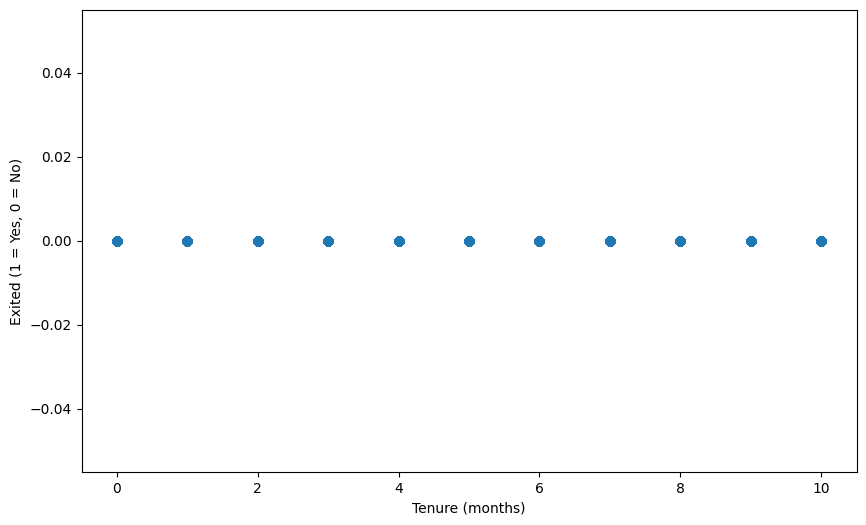

In [ ]:
#plotting graph with tenure and churn rate
plt.subplots(figsize=(10, 6))
plt.plot(dc['Tenure'], dc['Exited'], 'o')
plt.xlabel('Tenure (months)')
plt.ylabel('Exited (1 = Yes, 0 = No)')
plt.show()

In [ ]:
#coefficient correlation

correlation = dc['Tenure'].corr(dc['Exited'])
print('Correlation coefficient:', correlation)

Correlation coefficient: nan


NameError: ignored

In [ ]:
# Standardize the data
dc = dc.apply(lambda x: (x - x.mean()) / x.std())

# Print the data
print(dc)

In [ ]:
#Data dimensionality reduction
# Create the PCA model
pca = PCA(n_components=2)

# Fit the model to the data
pca.fit(dc)